In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# import the data

df = pd.read_csv("BDM_Ireland1960_2021.csv")

In [9]:
# let's look at the first 10 rows

df.head(10)

Quarter    State  Marriages Registered (Number)  \
0  1960Q1  Ireland                           2987   
1  1960Q2  Ireland                           3501   
2  1960Q3  Ireland                           5900   
3  1960Q4  Ireland                           3106   
4  1961Q1  Ireland                           2179   
5  1961Q2  Ireland                           3959   
6  1961Q3  Ireland                           5722   
7  1961Q4  Ireland                           3280   
8  1962Q1  Ireland                           2732   
9  1962Q2  Ireland                           3385   

   Marriage Rate Registered per 1,000 Estimated Population (Number)  \
0                                                4.2                  
1                                                4.9                  
2                                                8.3                  
3                                                4.4                  
4                                                3.1                  
5                                                5.6                  
6                                                8.3                  
7                                                4.7                  
8                                                3.9                  
9                                                4.8                  

   Deaths Registered (Number)  \
0                        9399   
1                        7882   
2                        6950   
3                        8427   
4                       11883   
5                        8251   
6                        6703   
7                        7711   
8                       10367   
9                        8732   

   Death Rate Registered per 1,000 Estimated Population (Number)  \
0                                               13.3               
1                                               11.1               
2                                                9.8               
3                                               11.7               
4                                               17.1               
5                                               11.7               
6                                                9.8               
7                                               10.9               
8                                               15.3               
9                                               12.1               

   Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  \
0                                               34.7                     
1                                               26.8                     
2                                               26.3                     
3                                               29.7                     
4                                               34.9                     
5                                               29.0                     
6                                               29.7                     
7                                               29.1                     
8                                               35.7                     
9                                               28.6                     

   Births Registered (Number)  \
0                       14614   
1                       16494   
2                       15612   
3                       14010   
4                       14692   
5                       16264   
6                       14895   
7                       13975   
8                       14875   
9                       16657   

   Birth Rate Registered per 1,000 Estimated Population (Number)  
0                                               20.6              
1                                               23.1              
2                                               22.2              
3                                               19.8              
4        

In [10]:
# the columns names are too awkward to type out
# we can copy paste from the output below much more easily

df.keys()

Index(['Quarter', 'State', 'Marriages Registered (Number)',
       'Marriage Rate Registered per 1,000 Estimated Population (Number)',
       'Deaths Registered (Number)',
       'Death Rate Registered per 1,000 Estimated Population (Number)',
       'Deaths of Infants under 1 Year Registered per 1,000 Births (Number)',
       'Births Registered (Number)',
       'Birth Rate Registered per 1,000 Estimated Population (Number)'],
      dtype='object')

In [11]:
# getting rid of the columns we don't need

df.drop(columns=[
    'Marriages Registered (Number)',
    'Marriage Rate Registered per 1,000 Estimated Population (Number)',
    'Deaths Registered (Number)',
    'Death Rate Registered per 1,000 Estimated Population (Number)'
], inplace=True
)

In [12]:
# a quick look at the bottom of the dataframe shows we only have 1st quarter for 2021

df.tail()

Quarter    State  \
240  2020Q1  Ireland   
241  2020Q2  Ireland   
242  2020Q3  Ireland   
243  2020Q4  Ireland   
244  2021Q1  Ireland   

     Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  \
240                                                2.9                     
241                                                2.7                     
242                                                2.5                     
243                                                2.9                     
244                                                2.7                     

     Births Registered (Number)  \
240                       14371   
241                       13527   
242                       14477   
243                       13584   
244                       13895   

     Birth Rate Registered per 1,000 Estimated Population (Number)  
240                                               11.7              
241                                               10.9              
242                                               11.6              
243                                               10.9              
244                                               11.2

In [13]:
# check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Quarter                                                              245 non-null    object 
 1   State                                                                245 non-null    object 
 2   Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  245 non-null    float64
 3   Births Registered (Number)                                           245 non-null    int64  
 4   Birth Rate Registered per 1,000 Estimated Population (Number)        245 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.7+ KB


In [14]:
# how many different types ov value in State

df["State"].unique()

array(['Ireland'], dtype=object)

In [15]:
# since there's only 1 we can drop that column too

df.drop(["State"], axis=1, inplace=True)

In [16]:
# here we're converting the quarters to a datetime value
# and setting that as the index

df.Quarter = pd.to_datetime(df.Quarter)
df.set_index('Quarter', inplace=True)

In [17]:
# summing the values by year

df = df.resample('A').sum()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-12-31 to 2021-12-31
Freq: A-DEC
Data columns (total 3 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  62 non-null     float64
 1   Births Registered (Number)                                           62 non-null     int64  
 2   Birth Rate Registered per 1,000 Estimated Population (Number)        62 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [19]:
#creating the new year column

df['year'] = pd.DatetimeIndex(df.index).year

In [20]:
df.head()

Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  \
Quarter                                                                           
1960-12-31                                              117.5                     
1961-12-31                                              122.7                     
1962-12-31                                              116.9                     
1963-12-31                                              106.9                     
1964-12-31                                              107.4                     

            Births Registered (Number)  \
Quarter                                  
1960-12-31                       60730   
1961-12-31                       59826   
1962-12-31                       61611   
1963-12-31                       62966   
1964-12-31                       64008   

            Birth Rate Registered per 1,000 Estimated Population (Number)  \
Quarter                                                                     
1960-12-31                                               85.7               
1961-12-31                                               84.0               
1962-12-31                                               87.5               
1963-12-31                                               89.4               
1964-12-31                                               90.2               

            year  
Quarter           
1960-12-31  1960  
1961-12-31  1961  
1962-12-31  1962  
1963-12-31  1963  
1964-12-31  1964

In [21]:
# resetting the index to 1, 2, 3, ...

df.reset_index(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Quarter                                                              62 non-null     datetime64[ns]
 1   Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  62 non-null     float64       
 2   Births Registered (Number)                                           62 non-null     int64         
 3   Birth Rate Registered per 1,000 Estimated Population (Number)        62 non-null     float64       
 4   year                                                                 62 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.5 KB


In [23]:
# getting rid of the now unnessecary quarter column

df.drop(columns=['Quarter'], inplace=True)

In [24]:
df.keys()

Index(['Deaths of Infants under 1 Year Registered per 1,000 Births (Number)',
       'Births Registered (Number)',
       'Birth Rate Registered per 1,000 Estimated Population (Number)',
       'year'],
      dtype='object')

In [25]:
# renaming the columns to something more manageable

df.rename(
    columns={
        'Deaths of Infants under 1 Year Registered per 1,000 Births (Number)':
        'inf_mort_rate',
        'Births Registered (Number)':
        'birth_tot',
        'Birth Rate Registered per 1,000 Estimated Population (Number)':
        'birth_rate'
    },
    inplace=True
)

In [26]:
df.head()

inf_mort_rate  birth_tot  birth_rate  year
0          117.5      60730        85.7  1960
1          122.7      59826        84.0  1961
2          116.9      61611        87.5  1962
3          106.9      62966        89.4  1963
4          107.4      64008        90.2  1964

In [27]:
df.tail(6)

inf_mort_rate  birth_tot  birth_rate  year
56           13.1      63897        54.8  2016
57           11.2      62053        52.1  2017
58           12.2      61016        50.4  2018
59           12.7      59796        48.8  2019
60           11.0      55959        45.1  2020
61            2.7      13895        11.2  2021

In [28]:
list(df["birth_tot"].tail(19))

[61517,
 61684,
 61042,
 64237,
 70620,
 75724,
 74928,
 74976,
 74650,
 72225,
 68930,
 67432,
 65909,
 63897,
 62053,
 61016,
 59796,
 55959,
 13895]

In [32]:
df.tail(17)

inf_mort_rate  birth_tot  birth_rate  year
45           16.0      61042        59.5  2005
46           14.8      64237        61.1  2006
47           12.5      70620        65.2  2007
48           15.3      75724        67.9  2008
49           12.7      74928        66.2  2009
50           15.1      74976        65.9  2010
51           13.8      74650        65.3  2011
52           13.9      72225        63.1  2012
53           13.2      68930        60.0  2013
54           14.7      67432        58.5  2014
55           12.4      65909        57.0  2015
56           13.1      63897        54.8  2016
57           11.2      62053        52.1  2017
58           12.2      61016        50.4  2018
59           12.7      59796        48.8  2019
60           11.0      55959        45.1  2020
61            2.7      13895        11.2  2021

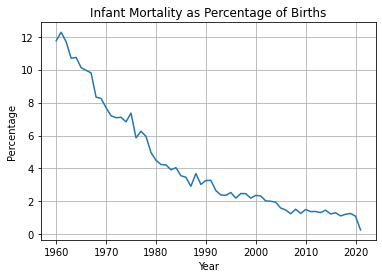

In [21]:
# let's have a look at the rate of infant mortality over time

plt.plot(df["year"], df["inf_mort_rate"]/10)
plt.title("Infant Mortality as Percentage of Births")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.grid()
plt.savefig("plots/bdm_inf_mort")

Since 2010 mortality rate has been less than 2% so no need to correct for error in 2nd order of magnitude.

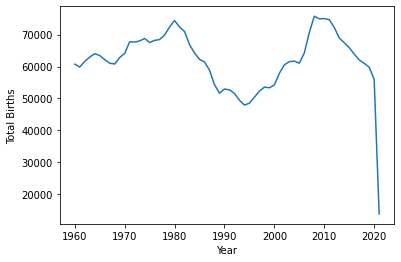

In [29]:
plt.plot(df["year"], df["birth_tot"])
plt.ylabel("Total Births")
plt.xlabel("Year")
plt.savefig("plots/bdm_tot_births", bbox_inches='tight')

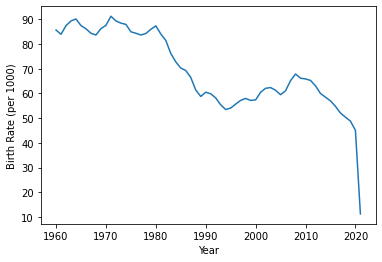

In [30]:
plt.plot(df["year"], df["birth_rate"])
plt.ylabel("Birth Rate (per 1000)")
plt.xlabel("Year")
plt.savefig("plots/bdm_rate_births", bbox_inches='tight')

In [24]:
df.to_csv("bdm_births_only.csv", index=False)

\* At this point I was still working off the condensed yearly values. The .csv file I saved in the cell above is used for the testing of the ML algorithms below but the results were unusable. I've left all this here even though only very little of the analysis in this notebook was used directly.

In [24]:
import multi_regressor as mlr

In [25]:
# vreating our independent and dependent variables

X = df[["year"]]
y = df["birth_tot"]

Path to save plot: mlr/bdm_linear_1


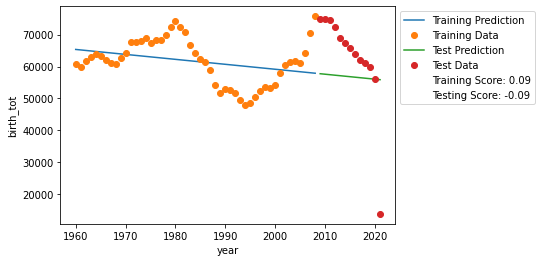

In [85]:
mlr.linear(X, y)

Path to save plot: mlr/bdm_poly_1


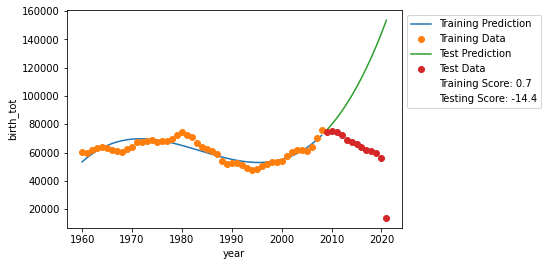

In [86]:
mlr.polynomial(X, y)

Path to save plot: mlr/bdm_poly_2


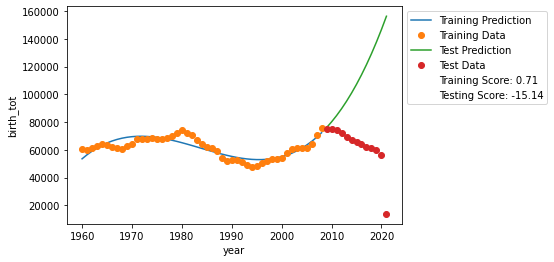

In [87]:
mlr.polynomial(X, y, degree=5)

Path to save plot: mlr/bdm_svr_1


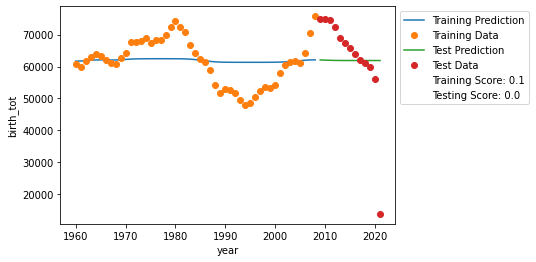

In [88]:
mlr.svr(X, y)

Path to save plot: mlr/bdm_bayes_1


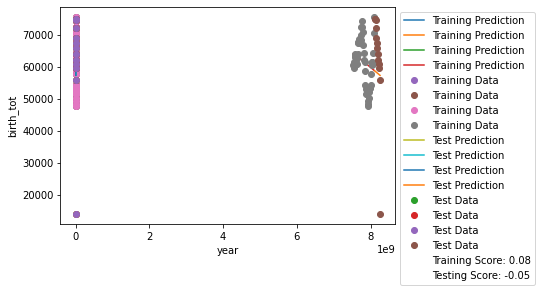

In [89]:
mlr.bayes_ridge(X, y)

Path to save plot: mlr/bdm_forest_1


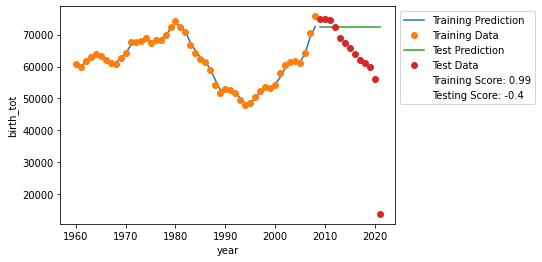

In [94]:
mlr.forest(X, y)

Path to save plot: mlr/bdm_forest_2


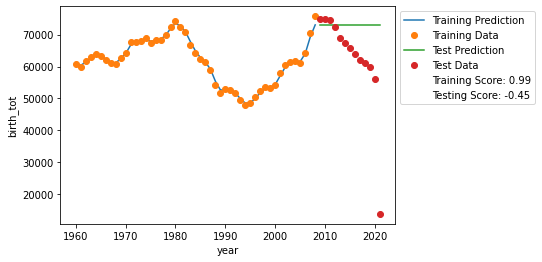

In [95]:
mlr.forest(X, y, n_estimators=2000)

degree= 9
Path to save plot: 


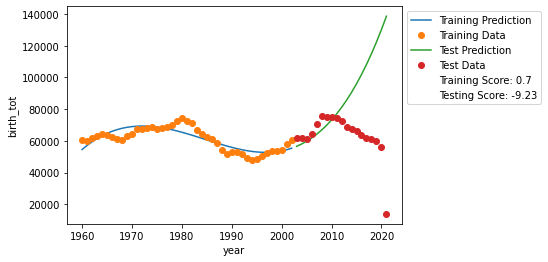

In [30]:
mlr.polynomial(X, y, t_size=0.3, degree=9)

degree= 3
Path to save plot: 


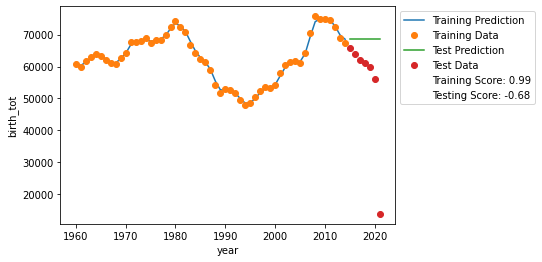

In [31]:
mlr.forest(X, y, t_size=0.1, n_estimators=2000)

In [32]:
df.tail()

inf_mort_rate  birth_tot  birth_rate  year
57           11.2      62053        52.1  2017
58           12.2      61016        50.4  2018
59           12.7      59796        48.8  2019
60           11.0      55959        45.1  2020
61            2.7      13895        11.2  2021

Dropping the 20201 row as we only have 1 quarter available.

In [35]:
# dropping the entry for 2021

df.drop([61], inplace=True)

In [37]:
X = df[["year"]]
y = df["birth_tot"]

degree= 9
Path to save plot: 


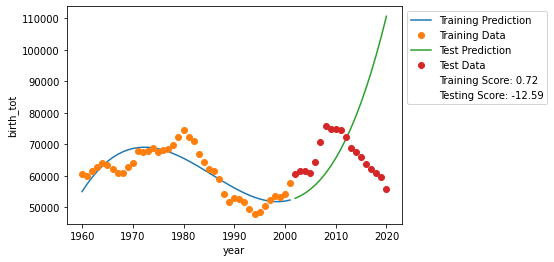

In [38]:
mlr.polynomial(X, y, t_size=0.3, degree=9)

degree= 3
Path to save plot: 


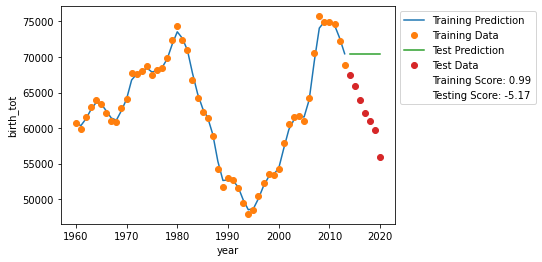

In [39]:
mlr.forest(X, y, t_size=0.1, n_estimators=2000)

degree= 9
Path to save plot: 


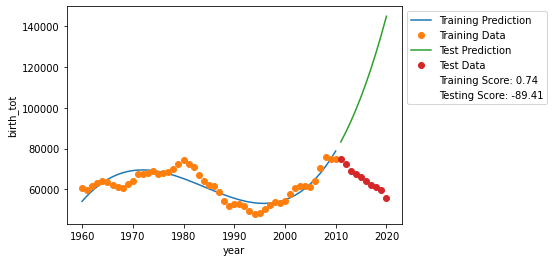

In [40]:
mlr.polynomial(X, y, t_size=0.15, degree=9)

degree= 2
Path to save plot: 


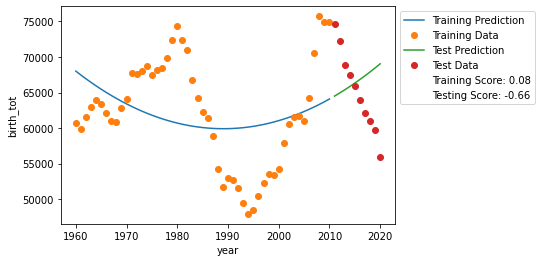

In [42]:
mlr.polynomial(X, y, t_size=0.15, degree=2)

In [43]:
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.linear_model import BayesianRidge, RidgeCV, LinearRegression

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
lin = LinearRegression()

cross_val_score(lin, X, y, cv=30).mean()

-11047.507628887044

In [53]:
bar = BayesianRidge()

cross_val_score(bar, X, y, cv=30).mean()

-9794.557676501143

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly = make_pipeline(PolynomialFeatures(3), LinearRegression())

cross_val_score(poly, X, y, cv=30).mean()

-13187.64249511486

In [56]:
for i in range(15):
    poly = make_pipeline(PolynomialFeatures(i), LinearRegression())
    score = cross_val_score(poly, X, y, cv=30).mean()
    print(score)

-9794.50627422467
-11047.507628887046
-10341.97013123528
-13187.64249511486
-13185.479490874273
-13181.590953637406
-13176.605905423989
-13170.51552087602
-13163.311596233449
-13154.986417031201
-13145.5328032904
-13134.94411834861
-13123.21424110386
-13110.337617748182
-13096.309239563712


In [57]:
rf = RandomForestRegressor()

cross_val_score(rf, X, y, cv=30).mean()

-140.54922596828737

In [58]:
X.shape, y.shape

((61, 1), (61,))

In [59]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Initialise the objects using StandardScaler() 
sc = StandardScaler()

# Train the objects using fit_transform()
X_norm = sc.fit_transform(X)

# reshaping y for scaling
y = df[["birth_tot"]]
y_norm = sc.fit_transform(y)
# then reshaping again to get back to the original shape for fitting
y_norm = np.reshape(y_norm, 61)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

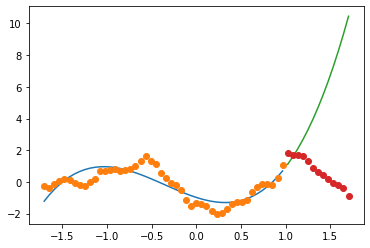

In [65]:
mlr.polynomial(X_norm, y_norm)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

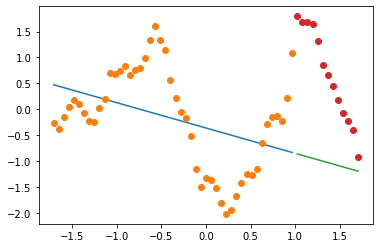

In [66]:
mlr.linear(X_norm, y_norm)

degree= 5


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

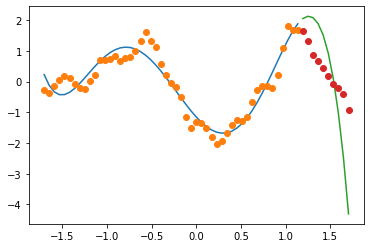

In [71]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=5)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

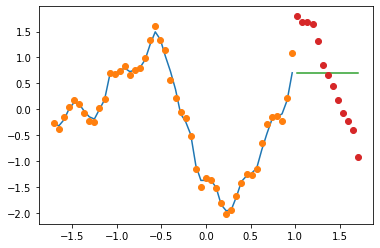

In [72]:
mlr.forest(X_norm, y_norm)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

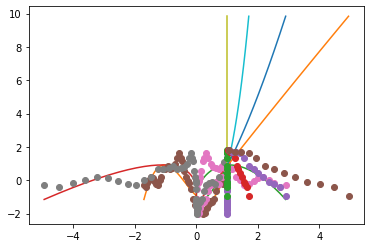

In [73]:
mlr.bayes_ridge(X_norm, y_norm)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

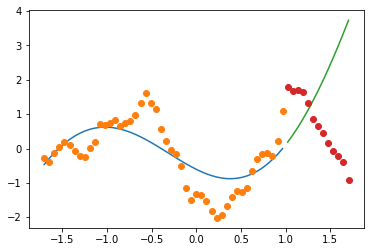

In [74]:
mlr.svr(X_norm, y_norm)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

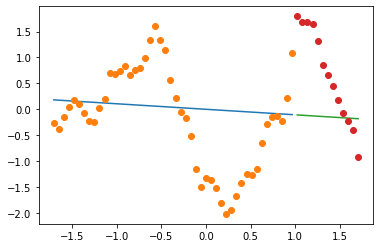

In [75]:
mlr.ridge_cv(X_norm, y_norm)

In [76]:
poly = make_pipeline(PolynomialFeatures(5), LinearRegression())

cross_val_score(poly, X_norm, y_norm, cv=30).mean()

-1855.305008582599

degree= 1


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

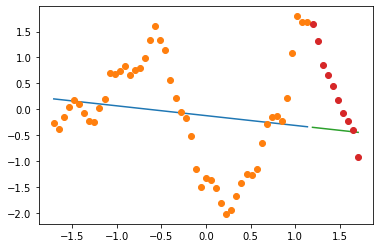

In [77]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=1)

degree= 2


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

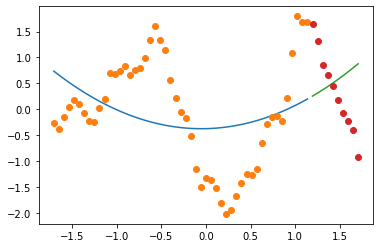

In [78]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=2)

degree= 3


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

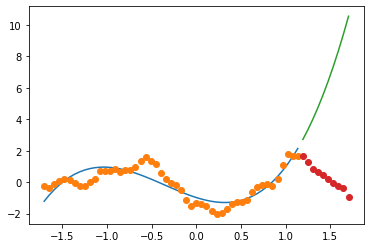

In [79]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=3)

degree= 4


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

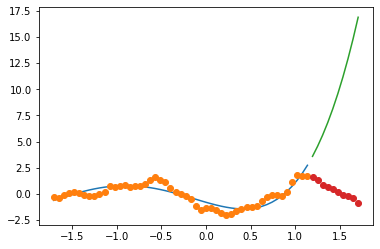

In [80]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=4)

degree= 5


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

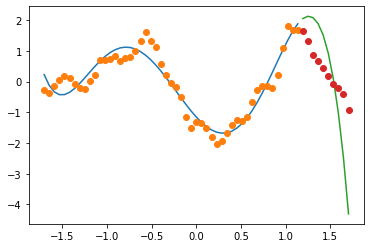

In [81]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=5)

degree= 6


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

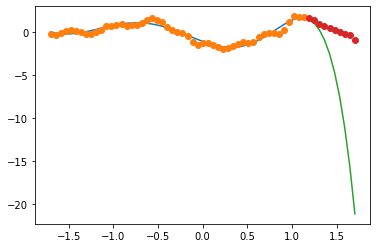

In [82]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=6)

degree= 7


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

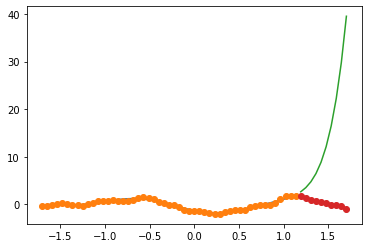

In [83]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=7)

degree= 8


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

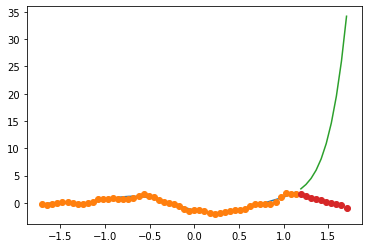

In [84]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=8)

degree= 9


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

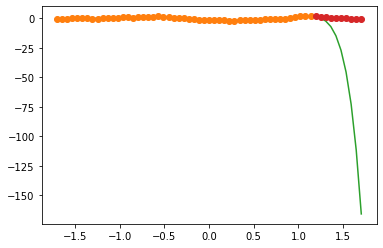

In [85]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=9)

degree= 10


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

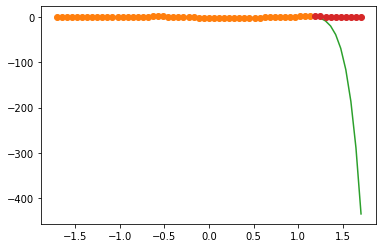

In [86]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=10)

degree= 11


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

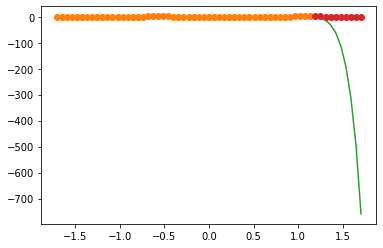

In [87]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=11)

degree= 12


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

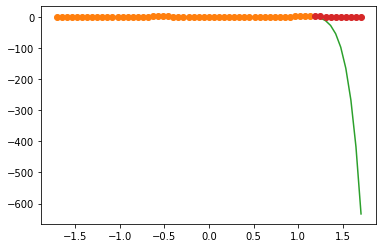

In [88]:
mlr.polynomial(X_norm, y_norm, t_size=0.15, degree=12)

degree= 5


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

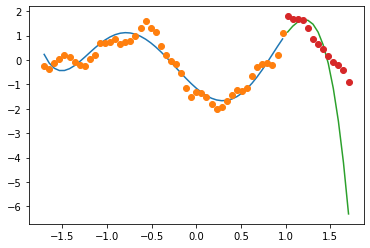

In [93]:
mlr.polynomial(X_norm, y_norm, r_state=42, degree=5)

In [169]:
def regressor(X, y, t_size, r_state, algorithm):
    
    # split the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=t_size,
            random_state=r_state,
            shuffle=False
            )


    # fit the data
    algorithm.fit(X=X_train, y=y_train)

    # make the prediction using regression
    train_predict = algorithm.predict(X_train)
    test_predict = algorithm.predict(X_test)

    # calculate the r2 score for the training and testing
    train_score = r2_score(y_train, train_predict)
    test_score = r2_score(y_test, test_predict)

#     print("Train score: ", train_score, "Test score: ", test_score)
    
    # plot the data and regression along with scores
#     plt.plot(X_train, list(train_predict), label="Training Prediction")
#     plt.plot(X_train, list(y_train), 'o', label="Training Data")
#     plt.plot(X_test, list(test_predict), label="Test Prediction")
#     plt.plot(X_test, list(y_test), 'o', label="Test Data")

#     plt.plot([], [], ' ', label="Training Score: "+str(round(train_score, 2)))
#     plt.plot([], [], ' ', label="Testing Score: "+str(round(test_score, 2)))

#     plt.xlabel("Year")
#     plt.ylabel("Births")

#     plt.legend(bbox_to_anchor=(1, 1))

    # save the plot produced
#     filename = str(input("Path to save plot: "))
#     plt.savefig(filename, bbox_inches='tight')
    return test_score

In [139]:
def polynomial(X, y, t_size=0.2, r_state=0, degree=3):
    """Linear regression algorithm.
    Available args: X, y, t_size, r_state, degree"""
    algorithm = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    score = regressor(X, y, t_size, r_state, algorithm)
    return score

In [99]:
poly = make_pipeline(PolynomialFeatures(5), LinearRegression())

cross_val_score(poly, X_norm, y_norm, cv=30).mean()

-1855.305008582599

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


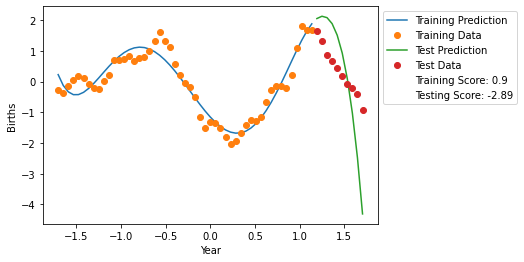

In [117]:
polynomial(X_norm, y_norm, degree=5, t_size=0.15)

## Testing the effects of split size on R2 score

In [140]:
splits = np.arange(0.1, 0.3, 0.01)
scores = []

for i in splits:
    t = polynomial(X_norm, y_norm, degree=5, t_size=i)
    scores.append(t)

Train score:  0.9029421087479064 Test score:  -73.29660761198161
Train score:  0.9029421087479064 Test score:  -73.29660761198161
Train score:  0.9037478000345184 Test score:  -34.10582742548387
Train score:  0.9037478000345184 Test score:  -34.10582742548387
Train score:  0.903223142676845 Test score:  -10.535394850686476
Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8877504261554099 Test score:  -2.2062064426206347
Train score:  0.882467338588116 Test score:  -4.112960176833311
Train score:  0.882467338588116 Test score:  -4.112960176833311
Train score:  0.8804830648419217 Test score:  -21.496262871914332
Train score:  0.8813142399589492 Test score:  -5.089957529922492
Train score:  0.8813142399589492 Test score:  -5.089957529922492
Train score:  0.8930735

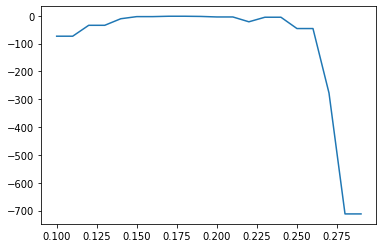

In [141]:
plt.plot(splits, scores)

In [142]:
scores

[-73.29660761198161,
 -73.29660761198161,
 -34.10582742548387,
 -34.10582742548387,
 -10.535394850686476,
 -2.889641434140403,
 -2.889641434140403,
 -1.5408515678147894,
 -1.5408515678147894,
 -2.2062064426206347,
 -4.112960176833311,
 -4.112960176833311,
 -21.496262871914332,
 -5.089957529922492,
 -5.089957529922492,
 -45.776247574384264,
 -45.776247574384264,
 -277.5016324005339,
 -712.1657890376334,
 -712.1657890376334]

Train score:  0.903223142676845 Test score:  -10.535394850686476
Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8877504261554099 Test score:  -2.2062064426206347
Train score:  0.882467338588116 Test score:  -4.112960176833311
Train score:  0.882467338588116 Test score:  -4.112960176833311
Train score:  0.8804830648419217 Test score:  -21.496262871914332
Train score:  0.8813142399589492 Test score:  -5.089957529922492
Train score:  0.8813142399589492 Test score:  -5.089957529922492


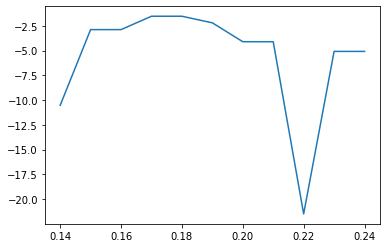

In [143]:
splits = np.arange(0.14, 0.25, 0.01)
scores = []

for i in splits:
    t = polynomial(X_norm, y_norm, degree=5, t_size=i);
    scores.append(t)
    
plt.plot(splits, scores)

Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8995342834424482 Test score:  -2.889641434140403
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8946864153235545 Test score:  -1.5408515678147894
Train score:  0.8877504261554099 Test score:  -2.2062064426206347
Train score:  0.882467338588116 Test score:  -4.112960176833311


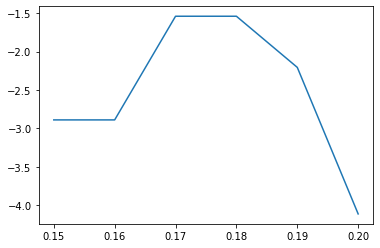

In [145]:
splits = np.arange(0.15, 0.21, 0.01)
scores = []

for i in splits:
    t = polynomial(X_norm, y_norm, degree=5, t_size=i);
    scores.append(t)
    
plt.plot(splits, scores)

Train score:  0.8946864153235545 Test score:  -1.5408515678147894


-1.5408515678147894

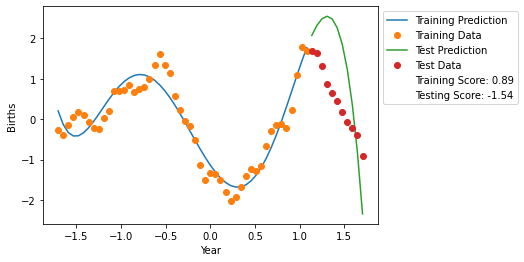

In [148]:
polynomial(X_norm, y_norm, degree=5, t_size=0.17)

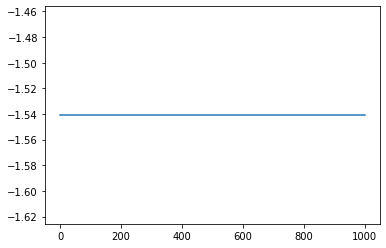

In [154]:
states = np.arange(0, 1000, 1)

scores = []

for i in states:
    t = polynomial(X_norm, y_norm, degree=5, t_size=0.17, r_state=i);
    scores.append(t)
    
plt.plot(states, scores)

In [155]:
polynomial(X_norm, y_norm, degree=5, t_size=0.17, r_state=42)

-1.5408515678147894

## Testeng the effect of polynomial degree on R2 score

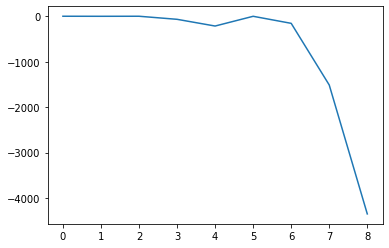

In [159]:
degrees = np.arange(0, 9, 1)

scores = []

for i in degrees:
    t = polynomial(X_norm, y_norm, degree=i, t_size=0.17);
    scores.append(t)
    
plt.plot(degrees, scores)

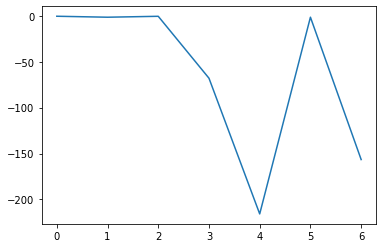

In [170]:
degrees = np.arange(0, 7, 1)

scores = []

for i in degrees:
    t = polynomial(X_norm, y_norm, degree=i, t_size=0.17);
    scores.append(t)
    
plt.plot(degrees, scores)

In [161]:
max(scores)

-0.496804278543973

In [162]:
scores.index(max(scores))

0

In [171]:
scores

[-0.496804278543973,
 -1.553813876367312,
 -0.5505552095971773,
 -67.99223961211055,
 -215.80208318179152,
 -1.5408515678147894,
 -156.5997419947136]

-0.496804278543973

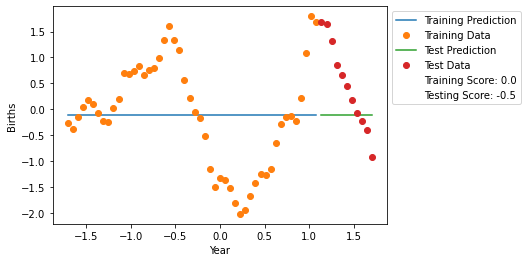

In [166]:
polynomial(X_norm, y_norm, degree=0, t_size=0.17, r_state=42)

-0.5505552095971773

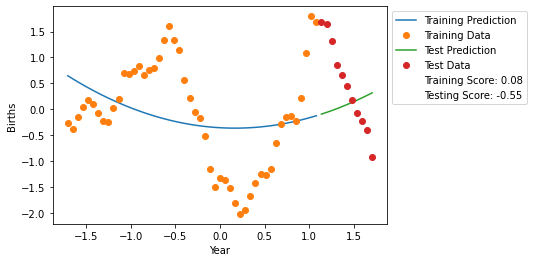

In [167]:
polynomial(X_norm, y_norm, degree=2, t_size=0.17, r_state=42)

In [186]:
x = np.arange(-np.pi, np.pi, 0.001)

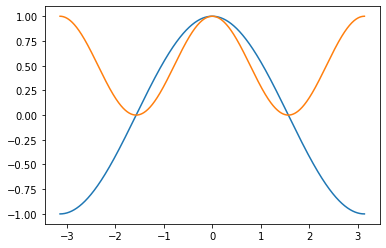

In [188]:
plt.plot(x, np.cos(x))
plt.plot(x, np.cos(x)**2)